# Data analysis tools exercise 2: Chi square

## Dataset: Bike sharing
I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. The dataset contains information on 'registered' users and 'casual' users of the bike rental system.

## Research question

Do casual and registered users tend to rent bikes at different days of the week (e.g. casual perhaps more in the weekend?)? More formally: is the proportion of bikes rented by casual users vs registered users dependent on the day of the week?

In [109]:
%matplotlib inline
import numpy
import pandas
import scipy.stats

data = pandas.read_csv('day.csv', low_memory=False)
data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [110]:
# give day a more descriptive name
recode = {0:'0-Sunday',1:'1-Monday',2:'2-Tuesday',3:'3-Wednesday',4:'4-Thursday',5:'5-Friday',6:'6-Saturday'}
data['weekdayname'] = data['weekday'].map(recode)
# construct a contingency table
sub = data[['weekdayname','casual','registered']]
ct = sub.groupby('weekdayname').sum()
ct = ct.transpose()
print(ct)

weekdayname  0-Sunday  1-Monday  2-Tuesday  3-Wednesday  4-Thursday  5-Friday  \
casual         140521     70784      57843        57319       61460     78238   
registered     303506    384719     411266       415729      423935    409552   

weekdayname  6-Saturday  
casual           153852  
registered       323955  


In [111]:
colsum=ct.sum(axis=0)
colpct=ct/colsum
print(colpct)

weekdayname  0-Sunday  1-Monday  2-Tuesday  3-Wednesday  4-Thursday  5-Friday  \
casual       0.316469  0.155397   0.123304      0.12117    0.126619  0.160393   
registered   0.683531  0.844603   0.876696      0.87883    0.873381  0.839607   

weekdayname  6-Saturday  
casual         0.321996  
registered     0.678004  


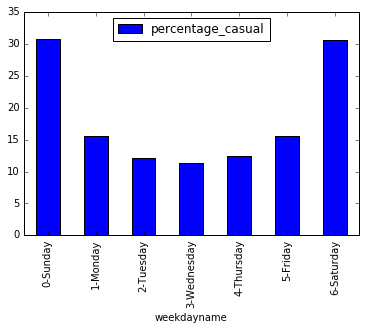

In [113]:
data['percentage_casual'] =data['casual']/(data['casual']+data['registered'])
data[['weekdayname','percentage_casual']].groupby('weekdayname').sum().plot(kind='bar');

In [65]:
print ('chi-square value, p value, expected counts')
cs= scipy.stats.chi2_contingency(ct)
print (cs)

chi-square value, p value, expected counts
(148308.82088963751, 0.0, 6, array([[  83611.03176441,   85771.981888  ,   88334.01459814,
          89075.73493074,   91400.69582094,   91851.67835371,
          89971.86264407],
       [ 360415.96823559,  369731.018112  ,  380774.98540186,
         383972.26506926,  393994.30417906,  395938.32164629,
         387835.13735593]]))


The Chi-square test shows that the proportion of bikes rented by registered users vs casual users is dependent on the day of the week. Post hoc tests are required to show how exactly.

In [116]:
numcomparisons = 0
table = pandas.DataFrame('-',index=range(0,7),columns=range(0,7))
for x in range(0,7):
    for y in range(x+1,7):
        day1=recode[x]
        day2=recode[y]        
        #print(day1,day2)
        sub2=sub[(sub['weekdayname'] == day1) | (sub['weekdayname'] == day2)]
        ct = sub2.groupby('weekdayname').sum()
        ct = ct.transpose()
        #print(ct)
        colsum=ct.sum(axis=0)
        colpct=ct/colsum
        #print(colpct)
        chi2, p, dof, ex = scipy.stats.chi2_contingency(ct)
        #print ('p value', p)
        numcomparisons = numcomparisons+1
        table.iloc[y,x] = p

print("number of comparisons ",numcomparisons)
pcritical = 0.05/numcomparisons
print("Bonferroni corrected critical p: ",pcritical)
table

number of comparisons  21
Bonferroni corrected critical p:  0.002380952380952381


,0,1,2,3,4,5,6
0,-,-,-,-,-,-,-
1,0,-,-,-,-,-,-
2,0,0,-,-,-,-,-
3,0,0,0.00664576,-,-,-,-
4,0,0,6.25537e-06,5.86758e-15,-,-,-
5,0,2.49926e-10,0,0,0,-,-
6,9.07794e-08,0,0,0,0,0,-


## Conclusion
The proportion of bikes rented by casual users vs registered users depends on the day of the week. Significant differences in the proportion of rented bikes by casual and registered users are found between all pairs of weekdays, except between Tuesday and Wednesday.